In [ ]:
import pandas as pd

df = pd.read_csv("../data/raw/bank_transactions.csv")


1. Проверим распределение сумм транзакций, гистограмма и barplot

In [9]:
tmp_data = df["TransactionAmount (INR)"].copy()

# отсекаем 99ый процентиль чтоб слишком большие значения не растягивали график
cut_of = tmp_data.quantile(0.99) 
tmp_data_clipped = tmp_data[tmp_data <= cut_of]


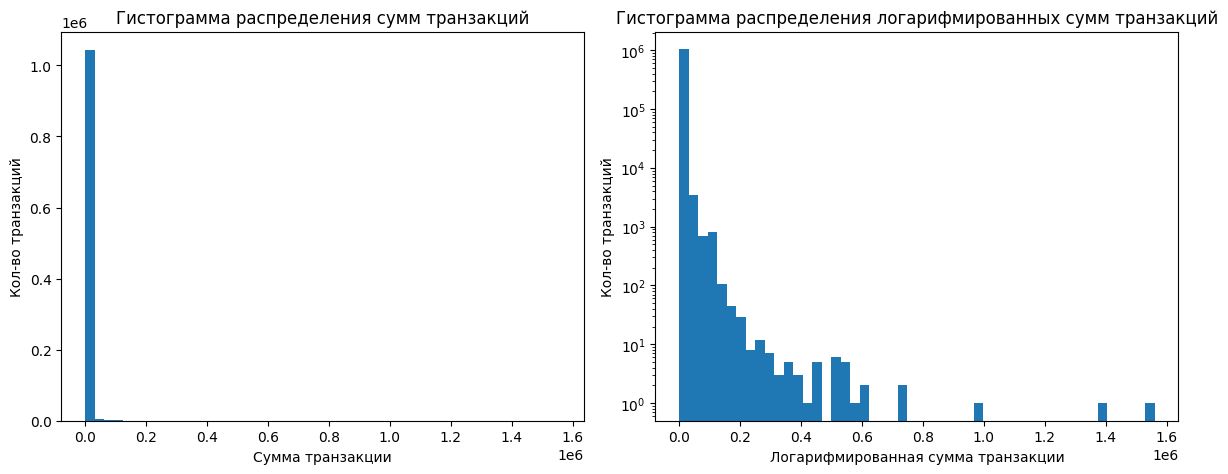

In [64]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
for i in range(2):
    axes[i].hist(tmp_data, bins = 50)
    axes[i].set_ylabel("Кол-во транзакций")
axes[0].set_xlabel("Cумма транзакции")
axes[0].set_title("Гистограмма распределения сумм транзакций")

axes[1].set_xlabel("Логарифмированная сумма транзакции")
axes[1].set_title("Гистограмма распределения логарифмированных сумм транзакций")
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()


Разделим данные на несколько частей для большей наглядности по порогу сумм транзакции

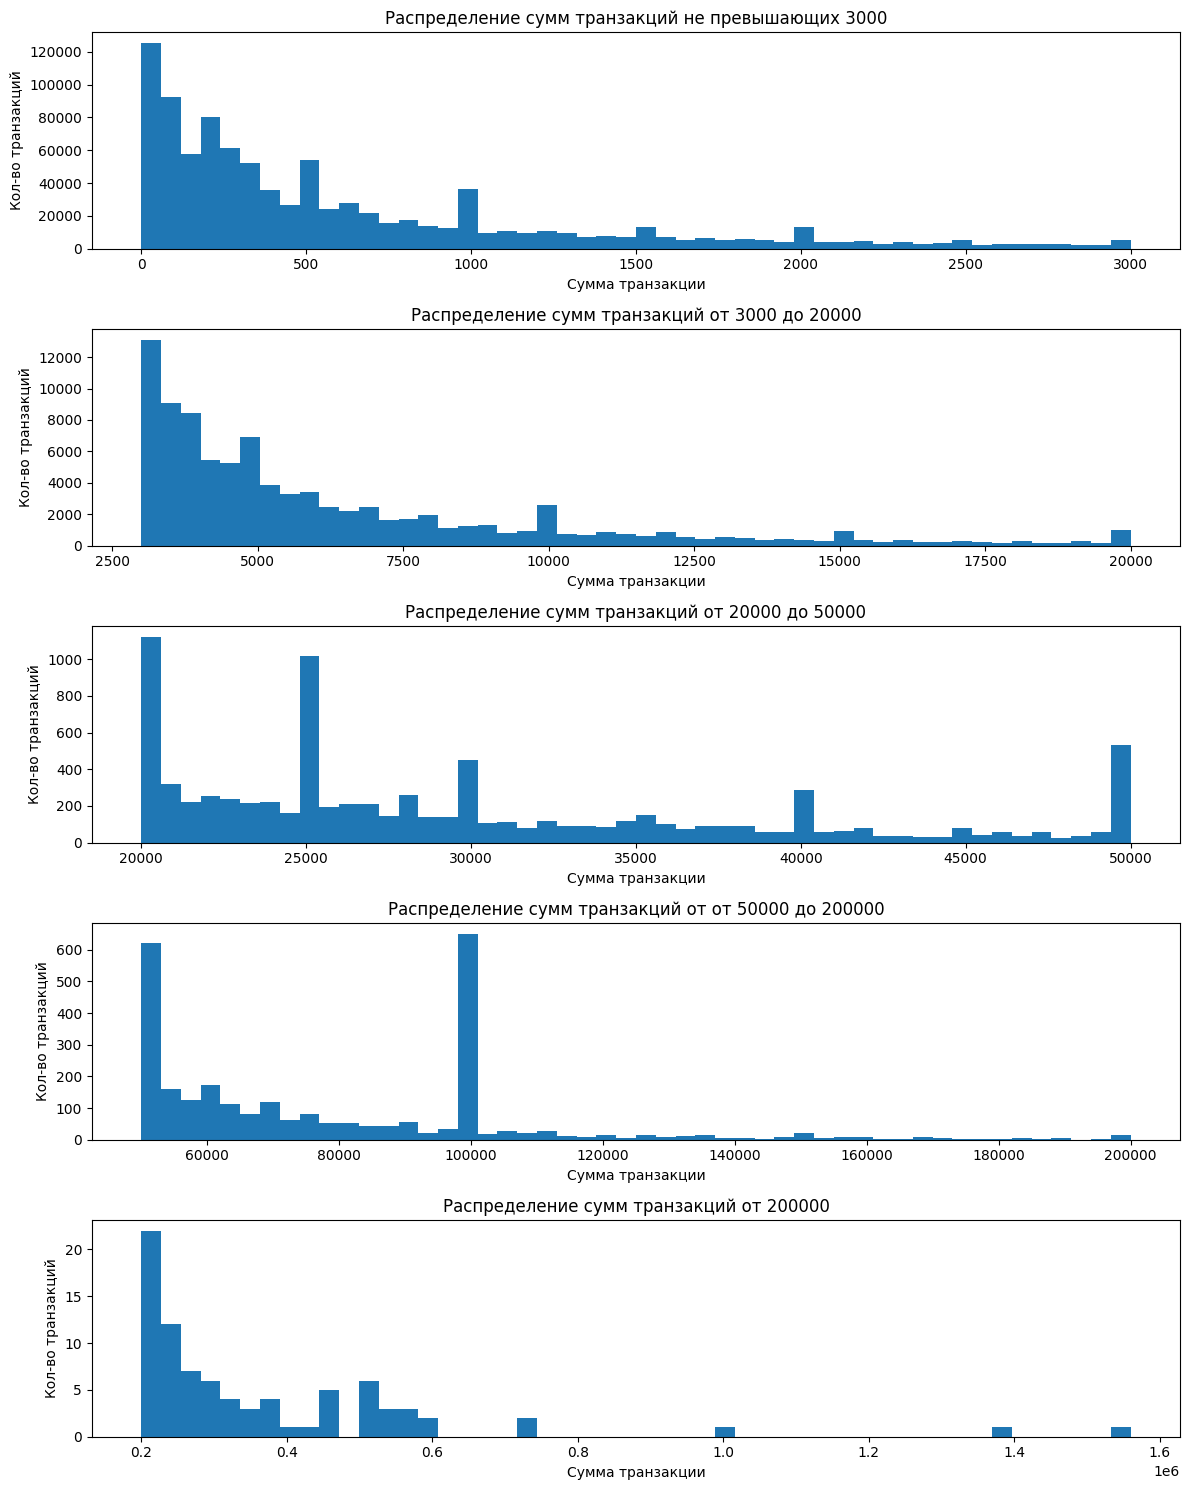

In [40]:
threshold1 = 3000
threshold2 = 20000
threshold3 = 50000
threshold4 = 200000

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12,15))
axes[0].hist(tmp_data[tmp_data <= threshold1], bins=50)
axes[0].set_title(f"Распределение сумм транзакций не превышающих {threshold1}")

axes[1].hist(tmp_data[(threshold1 <= tmp_data) & (tmp_data <= threshold2)], bins=50)
axes[1].set_title(f"Распределение сумм транзакций от {threshold1} до {threshold2}")

axes[2].hist(tmp_data[(threshold2 <= tmp_data) & (tmp_data <= threshold3)], bins=50)
axes[2].set_title(f"Распределение сумм транзакций от {threshold2} до {threshold3}")

axes[3].hist(tmp_data[(threshold3 <= tmp_data) & (tmp_data <= threshold4)], bins=50)
axes[3].set_title(f"Распределение сумм транзакций от от {threshold3} до {threshold4}")

axes[4].hist(tmp_data[threshold4 <= tmp_data], bins=50)
axes[4].set_title(f"Распределение сумм транзакций от {threshold4}")

for i in range(5):
    axes[i].set_xlabel("Cумма транзакции")
    axes[i].set_ylabel("Кол-во транзакций")
plt.tight_layout()
plt.show()

Посмотрим на графике boxplot где лежат суммы.
Ящик показывает центральные 50% данных (межквартильный размах)

Нижняя грань ящика это 25-й перцентиль (Q1 = 25% всех транзакций меньше этого значения)    
Верхняя грань ящика — 75-й перцентиль (Q3 = 75% всех транзакций меньше этого значения)
Линия внутри ящика — медиана (Q2 = половина транзакций меньше этого значения). Если медиана не по центру то распределение скошенно.

Значения от Q1 до Q3 это «типичные» значения(Средние 50% всех данных).

Нижний "ус" это минимальное значение, которое не считается выбросом. (Значение которое не меньше Q1 − 1.5 × IQR)
Верхний "ус" это максимальное значение, которое не считается выбросом.(Значение которое не больше Q3 + 1.5 × IQR)

Точки за границей усов - выбросы.

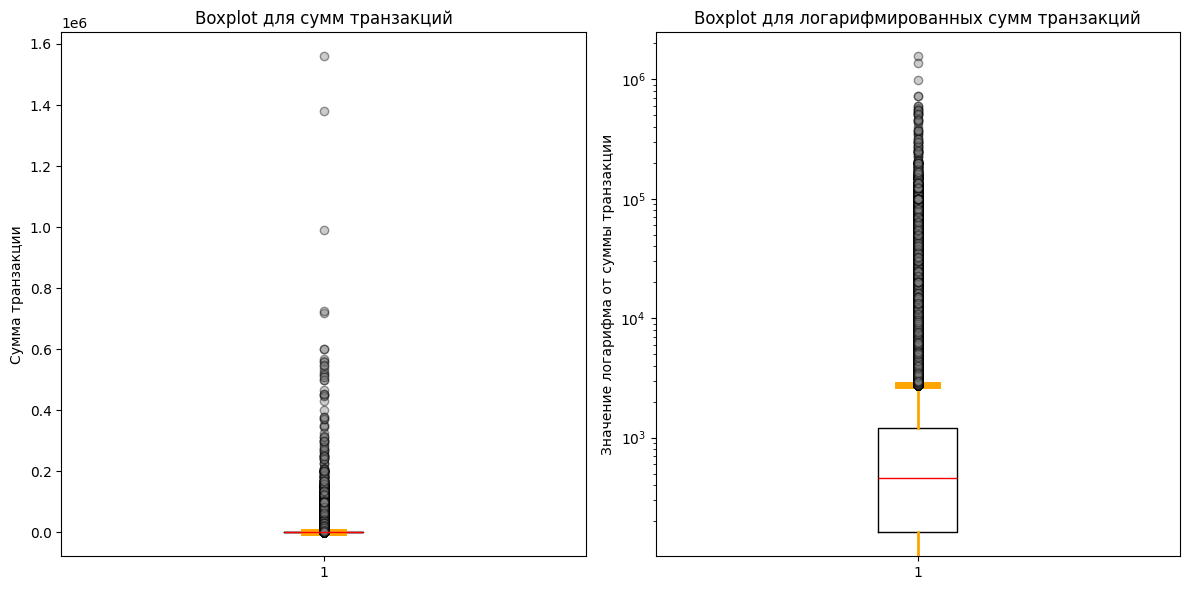

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for i in range(2):
    axes[i].boxplot(
    tmp_data,
    boxprops=dict(color='black'),
    medianprops=dict(color='red'),
    whiskerprops=dict(color='orange', linewidth=2),
    capprops=dict(color='orange', linewidth=5),
    flierprops=dict(marker='o', markerfacecolor='gray', alpha=0.4)
)
axes[0].set_ylabel("Сумма транзакции")
axes[0].set_title("Boxplot для сумм транзакций")

axes[1].set_yscale('log')
axes[1].set_ylabel("Значение логарифма от суммы транзакции")
axes[1].set_title("Boxplot для логарифмированных сумм транзакций")

plt.tight_layout()
plt.show()

Проверим распределение сумм на банковском счёте клиентов

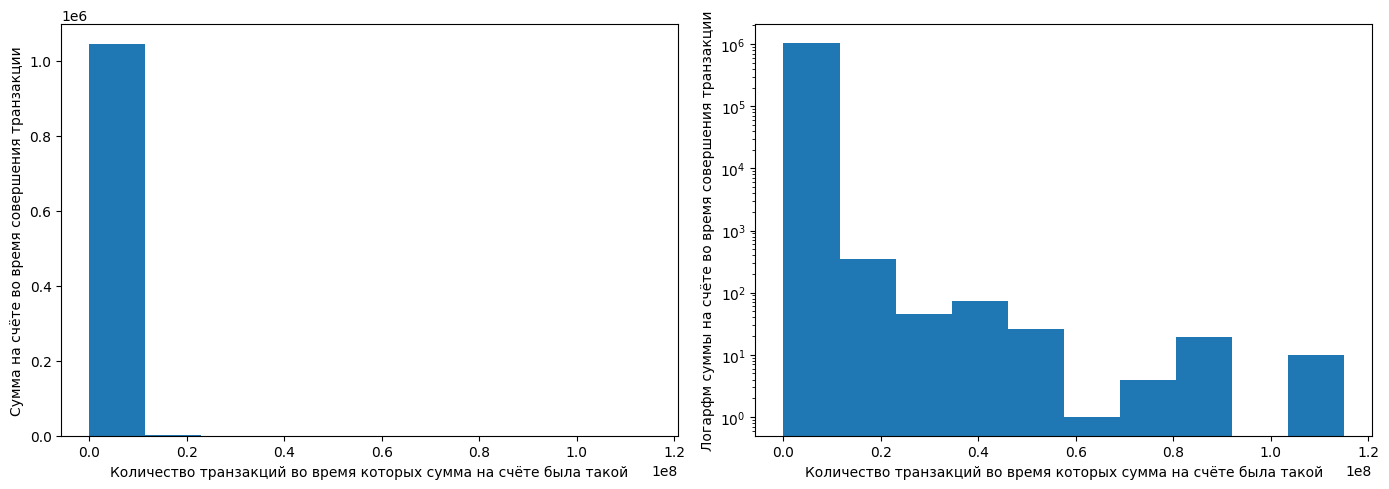

In [70]:
balance_data = df['CustAccountBalance'].copy()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
for i in range(2):
    axes[i].hist(balance_data)
    axes[i].set_xlabel('Количество транзакций во время которых сумма на счёте была такой')

axes[0].set_ylabel('Сумма на счёте во время совершения транзакции')

axes[1].set_ylabel('Логарфм суммы на счёте во время совершения транзакции')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()